<a href="https://colab.research.google.com/github/AmirHoseein99/project_and_challenges/blob/master/Google_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
from tensorflow import keras 
from matplotlib import pyplot as plt

In [2]:
! unzip "/content/drive/MyDrive/Google.zip"

Archive:  /content/drive/MyDrive/Google.zip
  inflating: Google_Stock_Price_Test.csv  
  inflating: Google_Stock_Price_Train.csv  


In [10]:
google_data = pd.read_csv("/content/Google_Stock_Price_Train.csv", index_col="Date", parse_dates=["Date"])
print(google_data.shape)
google_data.head()

(1258, 5)


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [11]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


In [12]:
google_data.Close = google_data.Close.apply(lambda x : x.replace(',', ''))
google_data.Volume = google_data.Volume.apply(lambda x : x.replace(',', ''))
google_data = google_data.astype("float32")

In [13]:
google_data.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.0
mean,533.710144,537.880615,529.007385,712.669678,3158107.0
std,151.904358,153.008774,150.552826,164.752609,2273726.0
min,279.119995,281.209991,277.220001,491.200012,7900.0
25%,404.114990,406.764992,401.764999,576.740021,1621700.0
50%,537.470001,540.750000,532.989990,695.675018,2566150.0
75%,654.922501,662.587494,644.800003,782.104980,4122500.0
max,816.679993,816.679993,805.140015,1216.829956,24977900.0


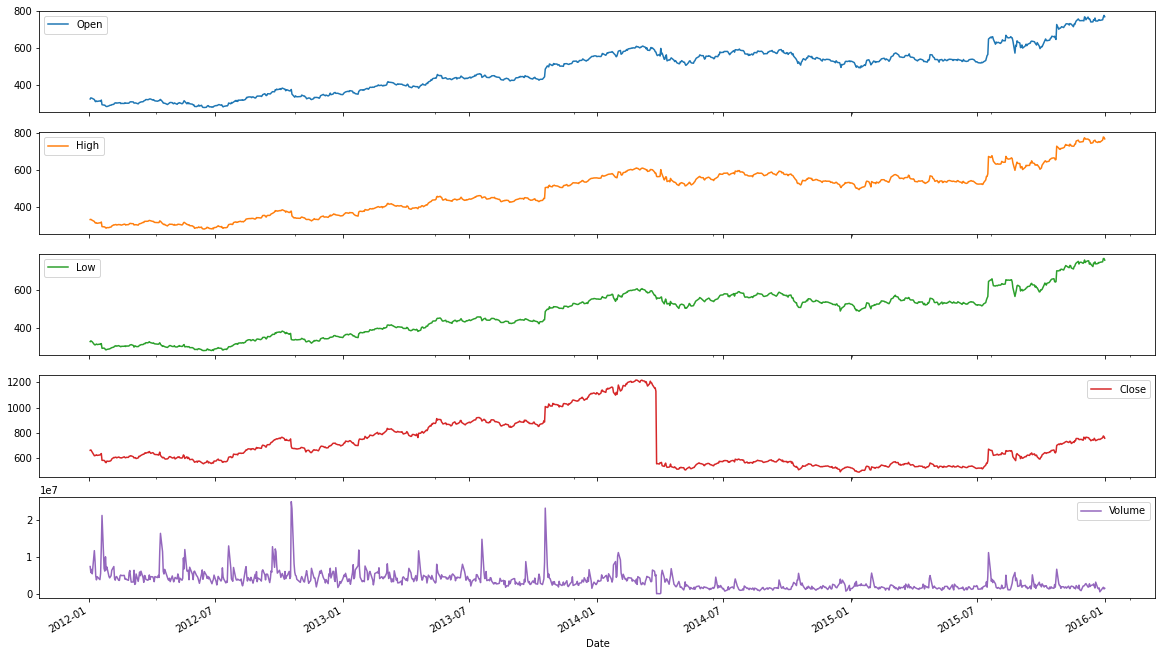

In [14]:
_ = google_data["2012":"2015"].plot(figsize=(20, 12), subplots=True)

In [16]:
close_data = pd.DataFrame(google_data["Close"])
# close_data = pd.concat([close_data, close_data.shift()], axis=1)
close_data.fillna(0, inplace=True)
close_data.head()

,Close
Date,
2012-01-03,663.590027
2012-01-04,666.450012
2012-01-05,657.210022
2012-01-06,648.239990
2012-01-09,620.760010


In [25]:
close_data.to_numpy()[30:].shape

(1228, 1)

In [26]:
close_data.to_numpy().shape

(1258, 1)

In [21]:
mean = close_data.mean()[0]
std = close_data.std()[0]
close_data = (close_data - mean) / std
close_data.head()

,Close
Date,
2012-01-03,-0.297899
2012-01-04,-0.280540
2012-01-05,-0.336624
2012-01-06,-0.391069
2012-01-09,-0.557865


In [27]:
close_data = close_data.to_numpy()

In [22]:
num_train_samples = int(0.5 * len(close_data))
num_val_samples = int(0.25 * len(close_data))
num_test_samples = len(close_data) - num_train_samples - num_val_samples
print(num_train_samples, num_val_samples, num_test_samples)

629 314 315


In [55]:
train_data = keras.utils.timeseries_dataset_from_array(
    data = close_data[:-30],
    targets = close_data[30: ],
    sequence_length = 30,
    shuffle = True,
    start_index = 0,
    end_index = num_train_samples
)
valid_data = keras.utils.timeseries_dataset_from_array(
    data = close_data[:-30],
    targets = close_data[30: ],
    sequence_length = 30,
    shuffle = True,
    start_index = num_train_samples,
    end_index = num_train_samples + num_val_samples
)
test_data = keras.utils.timeseries_dataset_from_array(
    data = close_data[:-30],
    targets = close_data[30: ],
    sequence_length = 30,
    shuffle = True,
    start_index = num_train_samples + num_val_samples,
)

In [40]:
for samples, targets in train_data:
  print("samples shape:", samples.shape)
  print("targets shape:", targets.shape)
  break

samples shape: (128, 30, 1)
targets shape: (128, 1)


In [41]:
for samples, targets in valid_data:
  print("samples shape:", samples.shape)
  print("targets shape:", targets.shape)
  break

samples shape: (128, 30, 1)
targets shape: (128, 1)


In [51]:
model= keras.models.Sequential([
                                   
    keras.layers.SimpleRNN(16, input_shape=[30, 1]),
    keras.layers.Dense(1),
])

In [52]:
model.compile(
    optimizer = "rmsprop",
    loss = 'mse',
    metrics=["mae"]
)

In [53]:
callbacks = [
      keras.callbacks.ModelCheckpoint("jena_dense.keras", save_best_only=True)
  ]

In [54]:
history = model.fit(train_data, epochs=20, verbose=1, validation_data=valid_data, callbacks=callbacks)

Epoch 1/20
5/5 [==============================] - 2s 105ms/step - loss: 1.9749 - mae: 1.1120 - val_loss: 0.9937 - val_mae: 0.9479
Epoch 2/20
5/5 [==============================] - 0s 58ms/step - loss: 1.3599 - mae: 0.8860 - val_loss: 0.6086 - val_mae: 0.7230
Epoch 3/20
5/5 [==============================] - 0s 57ms/step - loss: 0.9808 - mae: 0.7194 - val_loss: 0.3798 - val_mae: 0.5630
Epoch 4/20
5/5 [==============================] - 0s 39ms/step - loss: 0.7303 - mae: 0.6051 - val_loss: 0.2797 - val_mae: 0.4825
Epoch 5/20
5/5 [==============================] - 0s 55ms/step - loss: 0.5581 - mae: 0.5135 - val_loss: 0.2216 - val_mae: 0.4317
Epoch 6/20
5/5 [==============================] - 0s 55ms/step - loss: 0.4334 - mae: 0.4402 - val_loss: 0.1617 - val_mae: 0.3689
Epoch 7/20
5/5 [==============================] - 0s 38ms/step - loss: 0.3371 - mae: 0.3737 - val_loss: 0.1272 - val_mae: 0.3307
Epoch 8/20
5/5 [==============================] - 0s 38ms/step - loss: 0.2637 - mae: 0.3208 - va

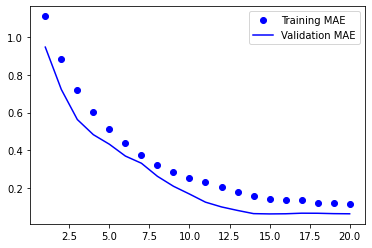

In [63]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
_ = plt.plot(epochs, loss, "bo", label="Training MAE")
_ = plt.plot(epochs, val_loss, "b", label="Validation MAE")
_ = plt.legend()

2/2 [==============================] - 0s 9ms/step - loss: 0.0113 - mae: 0.0821


[0.011251071467995644, 0.0820687934756279]